# <center>**AISC2007-01 - In-Class Case Study 2 - Group 2**</center>

Objective: to deploy a model using Flask/Gunicorn etc along with Streamlit or HuggingFace. This model can analyze images to classify the emotional expressions of individuals.

Model requirement:
> Build a transfer learnt model from a model trained on EfficientNet/VGG by unfreezing some existing layers.

|Team Members |	Contribution |
|-|-|
|Marcus Vinicius da Silva Fernandes	| Created the model, the GitHub repository, the deployment, and the report / video |
|Eduardo Lovo Torres | Created the Streamlit application |

References:
- https://youtu.be/HKoOBiAaHGg?si=g6G_0EvHdG31kfHC
- https://youtu.be/Q1NC3NbmVlc?si=CU_G94D9bNiKBpxQ

# **Links to the GitHub Repository, Streamlit App, and Video Recording**

GitHub repository: https://github.com/Marcus-Fernandes-LCIT/Facial_Expression_Recognition_App/tree/main

Streamlit App: https://aisc2007-1-iccs2-g2-efficientnet-unfreeze.streamlit.app

Video Recording: https://drive.google.com/file/d/1rGNtTKX7AcTWiG__cEZLay0UGozo0br1/view?usp=share_link

* the video 'EfficientNet_unfreeze_app_demo' can also be found in the root folder of the GitHub repository.

# <center>**Facial Expression Recognition from Images**</center>

## Model training

The first step was to train the model using EfficientNet and the provided dataset. The following notebook contains the complete training workflow.
> EfficientNet_model_training.ipynb

The trained model was saved as a h5 file inside 'models' folder, with the following name:
>

the final model performance with the test dataset is:

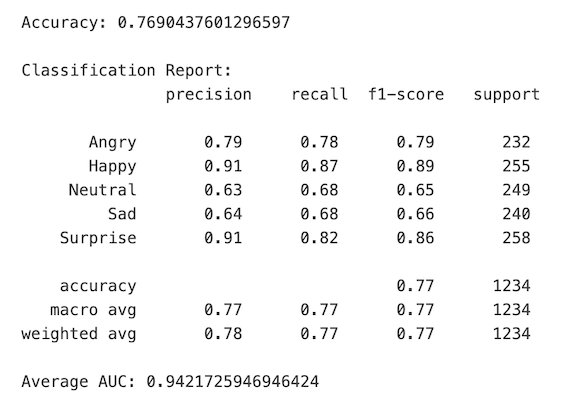

## Creating GitHub Repository for app

The next step was to create a GitHub repository for this application. It will contain the trained model and the Streamlit code.

The image below shows the GitHub repository.

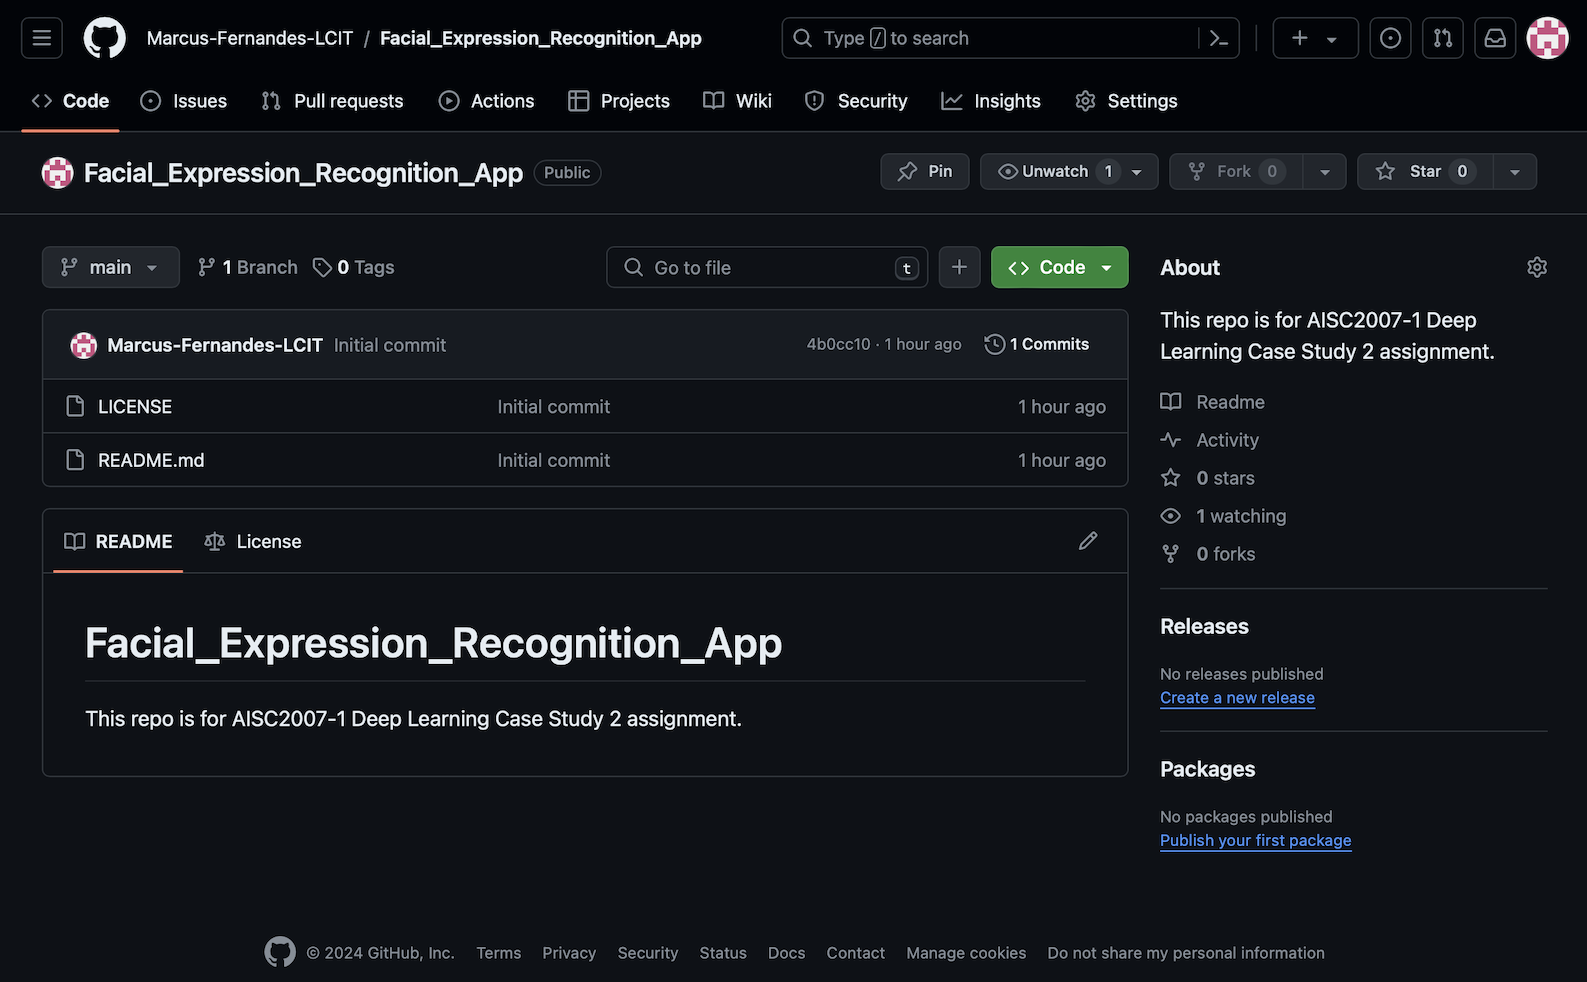

## Setup Streamlit Comunity Cloud account and link to Github

This step is required to deploy the app. We used our GitHub account credentials to create the account. 

Authorizing the Streamlit account connection with GitHub Repository:

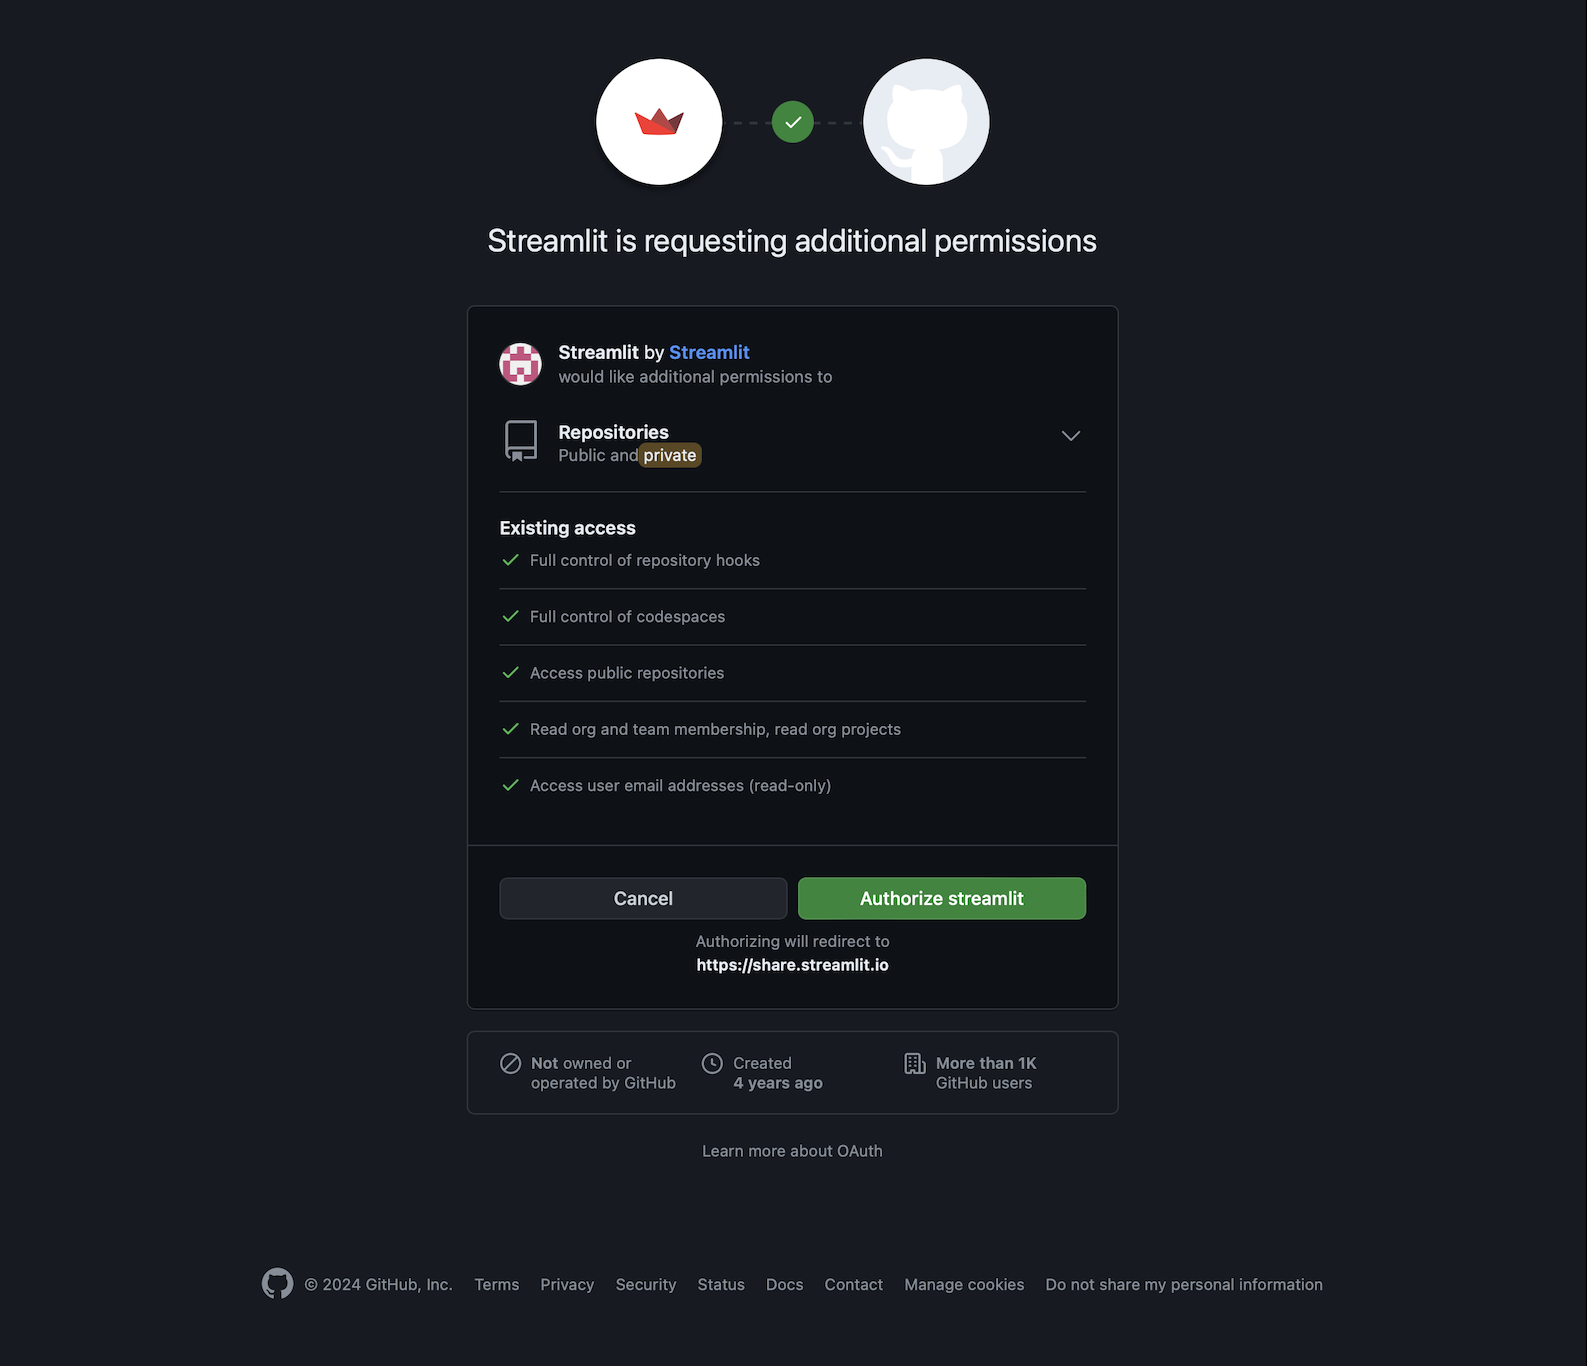

After this, the account is created and Streamlit is connected to the GitHub repository.

## Building a Streamlit app

The code below corresponds to the streamlit_app.py script.

In [ ]:
# importing libraries
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import numpy as np


# function to process the image and make the prediction
def import_and_predict(file, model):
    file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)  # converting the file to a numpy array
    img = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)  # using opencv to read the image data
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # converting the color from BGR to RGB
    img = cv2.resize(img, (224, 224))  # resize the image to 224 x 224
    img = np.expand_dims(img, axis=0)  # add batch dimension
    prediction = model.predict(img)  # making the prediction
    return prediction


# loading the h5 model from the 'models' directory and saving it in a cache memory
@st.cache(allow_output_mutation=True)  # to prevent loading the model multiple times every time the app is run
def load_h5_model():  # function to load the model
    model_path = './models/efficientnet_model_0769.h5'  # selecting the desired model
    model = load_model(model_path)
    return model

with st.spinner('Model is being loaded..'):  # to show a spinner in the Streamlit app UI while the model is being loaded
    model = load_h5_model()

# providing a title for the website
st.write("""
         # Facial Expression Recognition from Images
         """
         )

# loading the image from the user
file = st.file_uploader("Please upload an image containing a facial expression", type=["jpg", "png"])

# making the prediction
classes = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']

if file is None:
    st.text("Please upload an image file")
else:
    st.image(file, caption='Uploaded Image.', use_column_width=True)  # to display the image
    predictions = import_and_predict(file, model)  # making the predictions
    predicted_class = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    st.write(f"This image most likely belongs to {classes[predicted_class]} with a {100 * confidence:.2f}% confidence.")


## Deploy app to Streamlit Comunity Cloud

Then, the final step is to select the GitHub repository, the branch, the main file path (streamlit_app.py), and write a custom App URL name. 

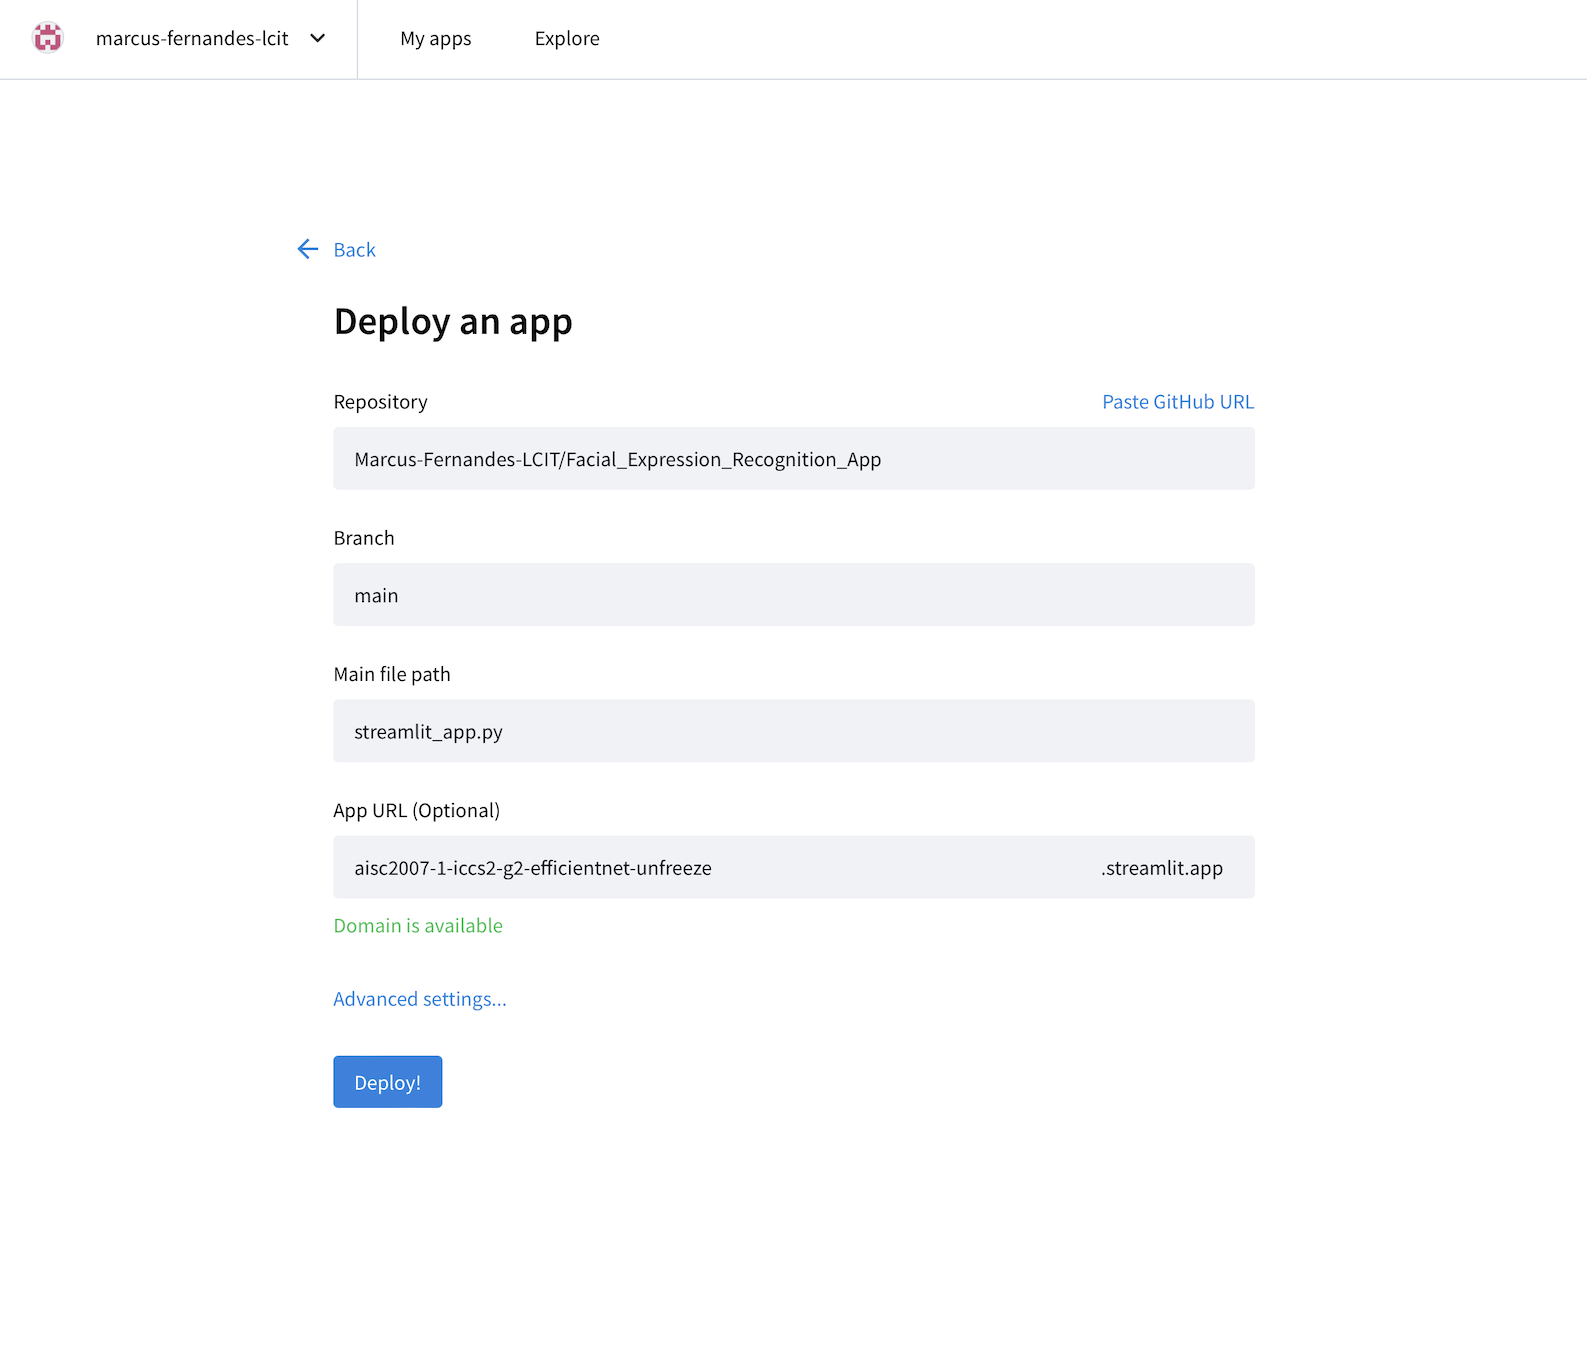

Now we are ready to deploy the model!

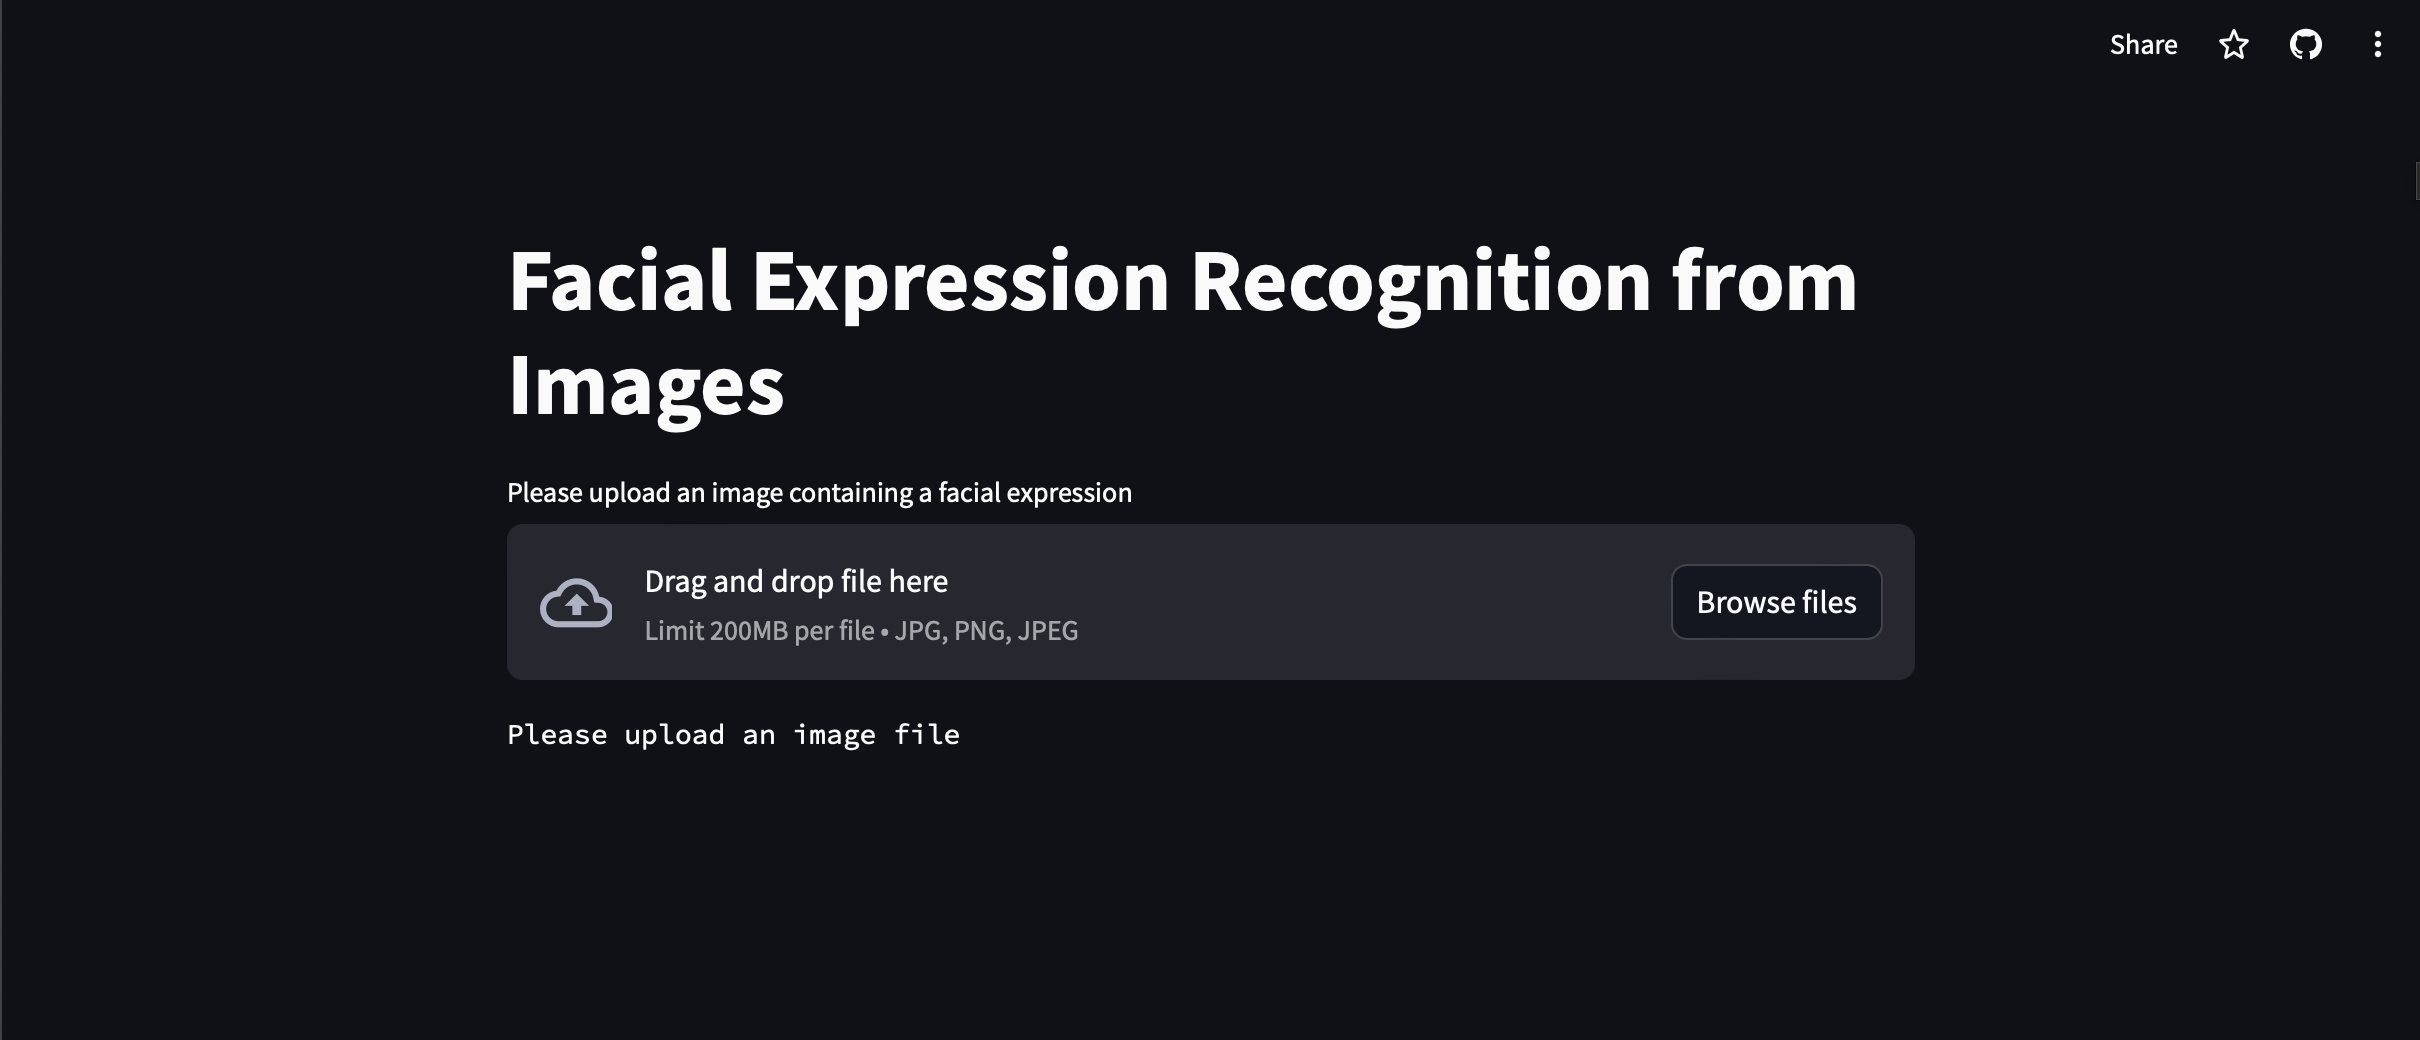

## Using the application

We added some images taken from the internet to test the model and the web application. in order to work, the images must be cropped to show the face only. The images can be found in the 'test_images' folder.

The image bellow illustrates the prediction. The model was able to successfully predict with a confidence of 99.81%.

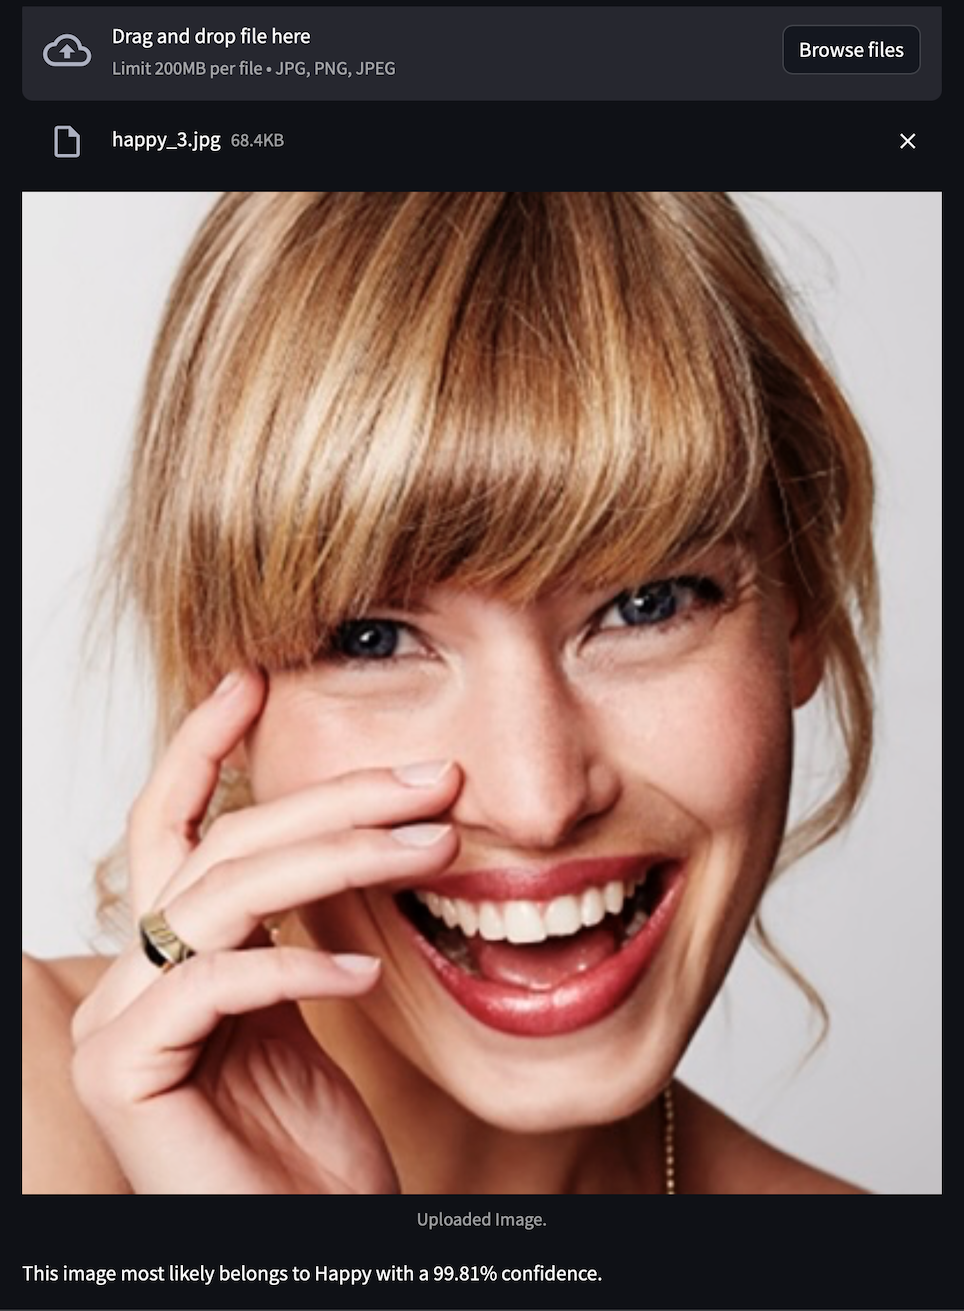